# Explore here

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from dotenv import load_dotenv

# load the .env file variables
load_dotenv()

# Get API key from environment
API_KEY = os.getenv('LASTFM_API_KEY')

## API Connection

1. La documentación se puede ver aquí: https://www.last.fm/api
2. Obtener la API key desde aquí: https://www.last.fm/api/account/create
3. La dirección a la cual debe hacerle preguntas es: https://ws.audioscrobbler.com/2.0/

### Ejemplo de lectura de la documentación:
Para obtener las canciones más escuchadas, consulta: https://www.last.fm/api/show/chart.getTopTracks

Esto hace una request a: `https://ws.audioscrobbler.com/2.0/?method=chart.gettoptracks&api_key=YOUR_API_KEY&format=json`

Necesitas reemplazar `YOUR_API_KEY` con tu clave de API real.

In [2]:
# 1. Request from the Last.fm API for top tracks
ret = requests.get(
    f"https://ws.audioscrobbler.com/2.0/?method=chart.gettoptracks&api_key=bb68ba0ef46a732ad2242637798ea8cd&format=json"
)

# Check if the request was successful
if ret.status_code == 200:
    data = ret.json()
    print("✓ Request successful!")
    print(f"Retrieved {len(data['tracks']['track'])} top tracks")
else:
    print(f"✗ Error: {ret.status_code}")
    print(ret.json())

✓ Request successful!
Retrieved 50 top tracks


In [3]:
# 2. Show track information
print("\nTop 10 tracks:")
print("-" * 60)
for i, track in enumerate(data['tracks']['track'][:10], 1):
    name = track.get('name', 'N/A')
    artist = track.get('artist', {}).get('name', 'N/A') if isinstance(track.get('artist'), dict) else track.get('artist', 'N/A')
    duration = track.get('duration', 'N/A')
    listeners = track.get('listeners', 'N/A')
    print(f"{i}. {name} - {artist}")
    print(f"   Duración: {duration}s | Oyentes: {listeners}")


Top 10 tracks:
------------------------------------------------------------
1. End of Beginning - Djo
   Duración: 159s | Oyentes: 1816377
2. The Fate of Ophelia - Taylor Swift
   Duración: 226s | Oyentes: 889148
3. Fame Is a Gun - Addison Rae
   Duración: 181s | Oyentes: 796664
4. WHERE IS MY HUSBAND! - RAYE
   Duración: 196s | Oyentes: 721360
5. I Thought I Saw Your Face Today - She & Him
   Duración: 185s | Oyentes: 641742
6. back to friends - sombr
   Duración: 199s | Oyentes: 1249455
7. Lush Life - Zara Larsson
   Duración: 201s | Oyentes: 1235804
8. 4 Raws - EsDeeKid
   Duración: 147s | Oyentes: 480696
9. Stateside + Zara Larsson - PinkPantheress
   Duración: 176s | Oyentes: 399336
10. Every Breath You Take - The Police
   Duración: 251s | Oyentes: 2700863


In [4]:
# 3. Create DataFrame
music = pd.DataFrame(data['tracks']['track'])

# Clean the dataframe
music_clean = music.drop(['mbid', 'image', 'url'], axis=1)

print("DataFrame shape:", music_clean.shape)
print("\nFirst 5 rows:")
music_clean.head()

DataFrame shape: (50, 6)

First 5 rows:


,name,duration,playcount,listeners,streamable,artist
0,End of Beginning,159,29454051,1816377,"{'#text': '0', 'fulltrack': '0'}","{'name': 'Djo', 'mbid': '83cedfd0-a118-48eb-ad..."
1,The Fate of Ophelia,226,19469652,889148,"{'#text': '0', 'fulltrack': '0'}","{'name': 'Taylor Swift', 'mbid': '20244d07-534..."
2,Fame Is a Gun,181,13960901,796664,"{'#text': '0', 'fulltrack': '0'}","{'name': 'Addison Rae', 'mbid': '610b71d9-fa78..."
3,WHERE IS MY HUSBAND!,196,6724613,721360,"{'#text': '0', 'fulltrack': '0'}","{'name': 'RAYE', 'mbid': '8be564c3-dfba-440b-a..."
4,I Thought I Saw Your Face Today,185,4584064,641742,"{'#text': '0', 'fulltrack': '0'}","{'name': 'She & Him', 'mbid': 'fb821608-35fd-4..."


## Ejercicio 1: Duración promedio de las 30 canciones más escuchadas

In [5]:
df_top30_duration = music_clean.iloc[:30].copy()
df_top30_duration['duration'] = pd.to_numeric(df_top30_duration['duration'], errors='coerce')

mean_duration = df_top30_duration['duration'].mean()
print(f"Duración promedio de las 30 canciones más escuchadas: {mean_duration:.2f} segundos ({mean_duration/60:.2f} minutos)")

Duración promedio de las 30 canciones más escuchadas: 215.07 segundos (3.58 minutos)


## Ejercicio 2: Gráfico de barras del top 10 artistas más escuchados

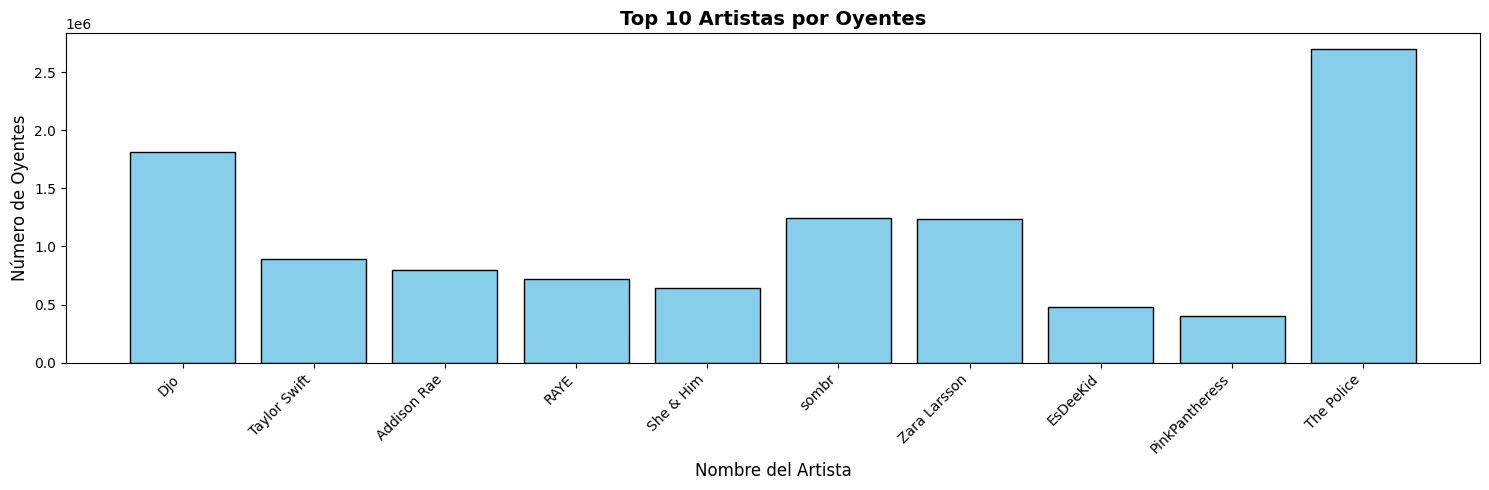

In [6]:
df_top10 = music_clean.head(10).copy()
df_top10['duration'] = pd.to_numeric(df_top10['duration'], errors='coerce')
df_top10['listeners'] = pd.to_numeric(df_top10['listeners'], errors='coerce')

# Extract artist name
df_top10['artist_name'] = df_top10['artist'].apply(lambda x: x['name'] if isinstance(x, dict) else str(x))

plt.figure(figsize=(15, 5))
plt.bar(df_top10['artist_name'], df_top10['listeners'], color='skyblue', edgecolor='black')
plt.xlabel('Nombre del Artista', fontsize=12)
plt.ylabel('Número de Oyentes', fontsize=12)
plt.title('Top 10 Artistas por Oyentes', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Ejercicio 3: Comparación - ¿Canciones con "happy" vs "sad" tienen más oyentes?

In [9]:
df_happy = music[music['name'].str.contains('happy',case=False,na=False)]
df_happy.count()

name          0
duration      0
playcount     0
listeners     0
mbid          0
url           0
streamable    0
artist        0
image         0
dtype: int64

In [10]:
df_sad = music[music['name'].str.contains('sad', case=False, na=False)]
df_sad.count()

name          0
duration      0
playcount     0
listeners     0
mbid          0
url           0
streamable    0
artist        0
image         0
dtype: int64

## Ejercicio 4: ¿De dónde provienen los top artistas? (Por país)

In [12]:
# Info api request:
ret_artist = requests.get(f"https://ws.audioscrobbler.com/2.0/?method=geo.gettopartists&country=spain&api_key=63e059c3c912a3f642daf2372484d183&format=json")
ret_artist.json()

{'topartists': {'artist': [{'name': 'ROSALÍA',
    'listeners': '11679',
    'mbid': '25f3abd9-63b5-471a-bd25-feb9672dfa11',
    'url': 'https://www.last.fm/music/ROSAL%C3%8DA',
    'streamable': '0',
    'image': [{'#text': 'https://lastfm.freetls.fastly.net/i/u/34s/2a96cbd8b46e442fc41c2b86b821562f.png',
      'size': 'small'},
     {'#text': 'https://lastfm.freetls.fastly.net/i/u/64s/2a96cbd8b46e442fc41c2b86b821562f.png',
      'size': 'medium'},
     {'#text': 'https://lastfm.freetls.fastly.net/i/u/174s/2a96cbd8b46e442fc41c2b86b821562f.png',
      'size': 'large'},
     {'#text': 'https://lastfm.freetls.fastly.net/i/u/300x300/2a96cbd8b46e442fc41c2b86b821562f.png',
      'size': 'extralarge'},
     {'#text': 'https://lastfm.freetls.fastly.net/i/u/300x300/2a96cbd8b46e442fc41c2b86b821562f.png',
      'size': 'mega'}],
    '@attr': {'rank': '1'}},
   {'name': 'Bad Bunny',
    'listeners': '11263',
    'mbid': '89aa5ecb-59ad-46f5-b3eb-2d424e941f19',
    'url': 'https://www.last.fm/music/